### **5. Finding and Extracting Communities (Q5)**

#### **5.1. Graph Analysis**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
# # load the graph
# N = nx.karate_club_graph()

# # visualize the graph
# nx.draw(N, with_labels = True)

# len(N.nodes), len(N.edges)

In [6]:
df = pd.read_csv('Airports2.csv')

# dataset clean up
df = df.dropna(subset=['Origin_city', 'Destination_city'])
df = df.drop_duplicates(subset=['Origin_city', 'Destination_city'])
df = df[df['Origin_city'] != df['Destination_city']]
df['Origin_city'] = df['Origin_city'].str.title()
df['Destination_city'] = df['Destination_city'].str.title()
# df = df[(df['Flights'] > 0) & (df['Distance'] > 0) & (df['Passengers'] > 0) & (df['Seats'] > 0)]

# Q1 = df['Distance'].quantile(0.25)
# Q3 = df['Distance'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df['Distance'] < (Q1 - 1.5 * IQR)) | (df['Distance'] > (Q3 + 1.5 * IQR)))]





In [7]:
G = nx.from_pandas_edgelist(df, 'Origin_city', 'Destination_city')

(563, 18631)

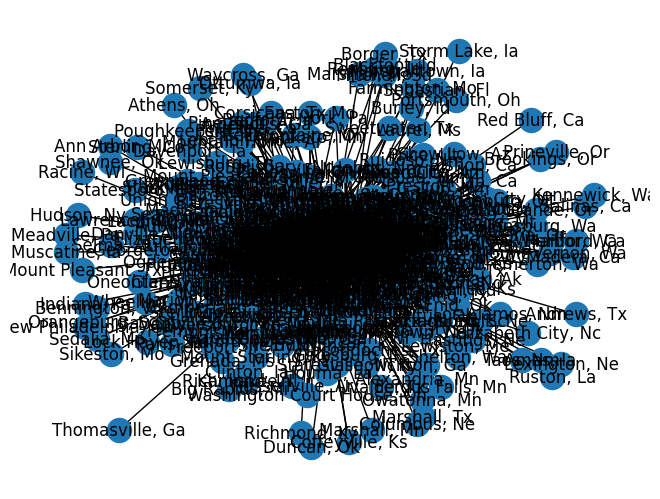

In [8]:
# visualize the graph
nx.draw(G, with_labels = True)

len(G.nodes), len(G.edges)

Creation of the graph starting from the dataset

#### **TO-DO:**
- ~~scrivere la funzione edge_betweenness_centrality()~~
- ~~scrivere la funzione connected_components()~~
- ~~scrivere la funzione number_connected_components()~~
- ~~una volta finite le funzioni e verificato che funzionano correttamente con l'esempio del grafo del club di karate, adattare il tutto con il dataset~~
- ~~aggiundere in un file python apposito, tutte le funzioni del punto 5 e importarle in modo da snellire il notebook~~
- fare punto 2 tramite l'uso di una LLM (copilot)

- cominciare AQ

In [9]:
from collections import deque

def edge_betweenness_centrality(graph):
    """
    Calculate the edge betweenness centrality (EBC) for each edge in the given graph.
    Parameters:
        graph (networkx.Graph): The input graph for which to calculate edge betweenness centrality.
    Returns:
        dict: A dictionary where keys are edges (tuples of nodes) and values are the EBC scores.
    """
    # initialize EBC scores for each edge to zero
    # ebc_scores = {edge: 0.0 for edge in graph.edges()}
    ebc_scores = {tuple(sorted(edge)): 0 for edge in graph.edges}
    
    for source in graph.nodes(): # iterate on each node of the graph
        # initializes the distance from the source node to all other nodes as infinity, 
        # except for the source node itself, which has a distance of zero
        distance = {node: float('inf') for node in graph.nodes()}
        distance[source] = 0
        # initializes the number of shortest paths from the source node to all other nodes as zero, 
        # except for the source node itself, which has one shortest path
        sigma = {node: 0 for node in graph.nodes()}
        sigma[source] = 1    
        # initializes a list of predecessors for each node as an empty list 
        # to keep track of the nodes that precede it on the shortest paths.
        predecessors = {node: [] for node in graph.nodes()}
        
        # uses a breadth-first search (BFS) to find the shortest paths 
        # from the source node to all other nodes. During this process, 
        # it updates the distance, sigma, and predecessors for each node.
        queue = deque([source])
        stack = []  
        # if there are at least one element left in the queue
        while queue:
            # remove the node from the queue and add it to the stack
            current = queue.popleft()
            stack.append(current)    
            # for each neighbors of the current node
            for neighbor in graph.neighbors(current):
                # if the visted node is new, updates his distance and appends it to the queue
                if distance[neighbor] == float('inf'):
                    distance[neighbor] = distance[current] + 1
                    queue.append(neighbor)
                # updates the number of shorter paths, of the current neighbor
                if distance[neighbor] == distance[current] + 1:
                    sigma[neighbor] += sigma[current]
                    predecessors[neighbor].append(current)
        
        # it initializes a dictionary delta to store the dependency of each node on the source node
        delta = {node: 0.0 for node in graph.nodes()}
        # calculates scores
        while stack:
            node = stack.pop()
            for pred in predecessors[node]:
                contribution = (sigma[pred] / sigma[node]) * (1 + delta[node])
                edge = tuple(sorted((node, pred)))  # not oriented edges
                ebc_scores[edge] += contribution
                delta[pred] += contribution
    
    # being an undirected graph, to avoid double counting, we divide each score by 2
    for edge in ebc_scores:
        ebc_scores[edge] /= 2.0
    
    return ebc_scores


In [43]:
# G_dict = nx.edge_betweenness_centrality(G.copy())
# print(G_dict)

# #print(sorted(G_dict.items(), key=lambda item: item[1], reverse = True))

# # for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
# #     max_edge = key
# #     break
# # print(max_edge)

# max_edge = max(G_dict, key=G_dict.get) #find the key associated with the max value in the dict
# print(max_edge)

In [44]:
G_dict = edge_betweenness_centrality(G.copy())
print(G_dict)

#print(sorted(G_dict.items(), key=lambda item: item[1], reverse = True))

# for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
#     max_edge = key
#     break
# print(max_edge)

max_edge = max(G_dict, key=G_dict.get) #find the key associated with the max value in the dict
print(max_edge)

{('Ames, Ia', 'Manhattan, Ks'): 442.9999999999999, ('Hays, Ks', 'Manhattan, Ks'): 43.597949189268675, ('Manhattan, Ks', 'Waco, Tx'): 12.384521069052886, ('Akron, Oh', 'Manhattan, Ks'): 14.721575005665859, ('Fargo, Nd', 'Manhattan, Ks'): 15.944096483031585, ('Manhattan, Ks', 'Tulsa, Ok'): 12.037524314520116, ('Austin, Tx', 'Manhattan, Ks'): 14.023695409957243, ('Bangor, Me', 'Manhattan, Ks'): 32.51424095875804, ('Dallas, Tx', 'Manhattan, Ks'): 36.97814071485397, ('Fresno, Ca', 'Manhattan, Ks'): 16.30318995629744, ('Joplin, Mo', 'Manhattan, Ks'): 15.329108067746697, ('Manhattan, Ks', 'Mobile, Al'): 14.434923326555172, ('Manhattan, Ks', 'Monroe, La'): 12.033693037309543, ('Manhattan, Ks', 'Newark, Nj'): 23.503852010737923, ('Manhattan, Ks', 'Salina, Ks'): 13.352338246190966, ('Manhattan, Ks', 'Topeka, Ks'): 8.550326778743774, ('Manhattan, Ks', 'Tucson, Az'): 16.692959730395028, ('Atlanta, Ga', 'Manhattan, Ks'): 32.64777481830515, ('Bozeman, Mt', 'Manhattan, Ks'): 11.864676559225524, ('Chi

In [45]:
# def edge_to_remove(graph):
#     G_dict = nx.edge_betweenness_centrality(graph)

#     # extract the edge with highest edge betweenness centrality score
#     max_edge = max(G_dict, key=G_dict.get) #find the key associated with the max value in the dict

#     return max_edge

In [10]:
def edge_to_remove(graph):
    """
    Identifies the edge with the highest edge betweenness centrality (EBC) score in the given graph.
    Parameters:
        graph (networkx.Graph): A NetworkX graph object.
    Returns:
        tuple: A tuple representing the edge with the highest EBC score.
    """
    G_dict = edge_betweenness_centrality(graph)

    # extract the edge with highest ebc score
    max_edge = max(G_dict, key=G_dict.get) #find the key associated with the max value in the dict

    return max_edge

In [11]:
def connected_components(graph):
    """
    Find all connected components in an undirected graph using a depth-first search (DFS).
    Parameters:
        graph (networkx.Graph): An undirected graph represented using the NetworkX library.
    Returns:
        list: A list of sets, where each set contains the nodes of a connected component.
    """
    
    visited = set() # already visited nodes
    components = [] # will contain sets of nodes of a connected component

    def dfs(node, component):
        visited.add(node)
        component.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs(neighbor, component)

    for node in graph.nodes():
        if node not in visited:
            component = set()
            dfs(node, component)
            components.append(component)

    return components


In [48]:
# def number_connected_components(graph):
#     """
#     Calculate the number of connected components in a given graph.
#     Parameters:
#         graph (dict): A dictionary representing the graph where keys are nodes and values are lists of adjacent nodes.
#     Returns:
#         int: The number of connected components in the graph.
#     """
#     return len(connected_components(graph))


In [12]:
def girvan_newman(graph):
	"""
	Implements the Girvan-Newman algorithm to detect communities in a graph by progressively removing edges.
	Parameters:
		graph (networkx.Graph): The input graph on which to perform community detection.
	Returns:
		list: A list of sets, where each set contains the nodes of a connected component in the graph.
	Notes:
	- This function uses the edge betweenness centrality to identify and remove edges.
	- The process continues until the graph is split into multiple connected components.
	"""
	sg = connected_components(graph)
	sg_count = len(sg) # number_connected_components(graph)

	while sg_count == 1:
		edge = edge_to_remove(graph)
		graph.remove_edge(edge[0], edge[1])
		sg = connected_components(graph)
		sg_count = len(sg) # number_connected_components(graph)
	return sg

In [13]:
def community_detection(graph, c1, c2):
	"""
	This function takes a graph and two nodes, c1 and c2, and performs community detection using the Girvan-Newman algorithm.
	It returns the detected communities, the number of communities, and a boolean indicating whether c1 and c2 are in the same community.
	Parameters:
		graph (networkx.Graph): The input graph on which community detection is performed.
		c1 (node): The first node to check for community membership.
		c2 (node): The second node to check for community membership.
	Returns:
		tuple: A tuple containing:
			- node_groups (list of lists): A list of communities, where each community is represented as a list of nodes.
			- len(node_groups) (int): The number of detected communities.
			- same_group (bool): True if c1 and c2 are in the same community, False otherwise.
	"""

	node_groups = []
	same_group = False
	x = girvan_newman(G.copy())

	for i in x:
		node_groups.append(list(i))

	for group in node_groups:
		if c1 in group and c2 in group:
			same_group = True
     
	return node_groups, len(node_groups), same_group

In [14]:
city_1 = 'Honolulu, Hi'
city_2 = 'Hilo, Hi'

result = community_detection(G.copy(), city_1, city_2)
communities = result[0]
print(f"The total number of communities is {result[1]}\n")

if result[2]:
    print(f"{city_1} and {city_2} are in the same community!\n")
else:
    print(f"{city_1} and {city_2} are NOT in the same community..\n")

for community in communities:
    print(community)

The total number of communities is 2

Honolulu, Hi and Hilo, Hi are in the same community!

['Manchester, Nh', 'Union City, Tn', 'Sheridan, Wy', 'Spokane, Wa', 'Shelbyville, Tn', 'Marshall, Mn', 'Corsicana, Tx', 'Jamestown, Nd', 'Indiana, Pa', 'Kalispell, Mt', 'Hudson, Ny', 'Fort Leonard Wood, Mo', 'Dallas, Tx', 'Great Bend, Ks', 'Tuscaloosa, Al', 'Fergus Falls, Mn', 'Sedalia, Mo', 'Portland, Me', 'Topeka, Ks', 'Yakima, Wa', 'Myrtle Beach, Sc', 'Burlington, Ia', 'State College, Pa', 'Staunton, Va', 'Somerset, Ky', 'Casper, Wy', 'Uvalde, Tx', 'Mount Pleasant, Mi', 'Newark, Nj', 'Bemidji, Mn', 'Columbus, Ms', 'Lawton, Ok', 'Lakeland, Fl', 'Salisbury, Nc', 'Decatur, Al', 'Ellensburg, Wa', 'College Station, Tx', 'Paducah, Ky', 'Modesto, Ca', 'Waco, Tx', 'Mount Vernon, Il', 'Elizabeth City, Nc', 'Santa Rosa, Ca', 'Columbus, Oh', 'Beaumont, Tx', 'Shelton, Wa', 'Auburn, Al', 'Williston, Nd', 'Sacramento, Ca', 'Hobbs, Nm', 'Bend, Or', 'Altoona, Pa', 'Decatur, Il', 'Zanesville, Oh', 'Bloomingto

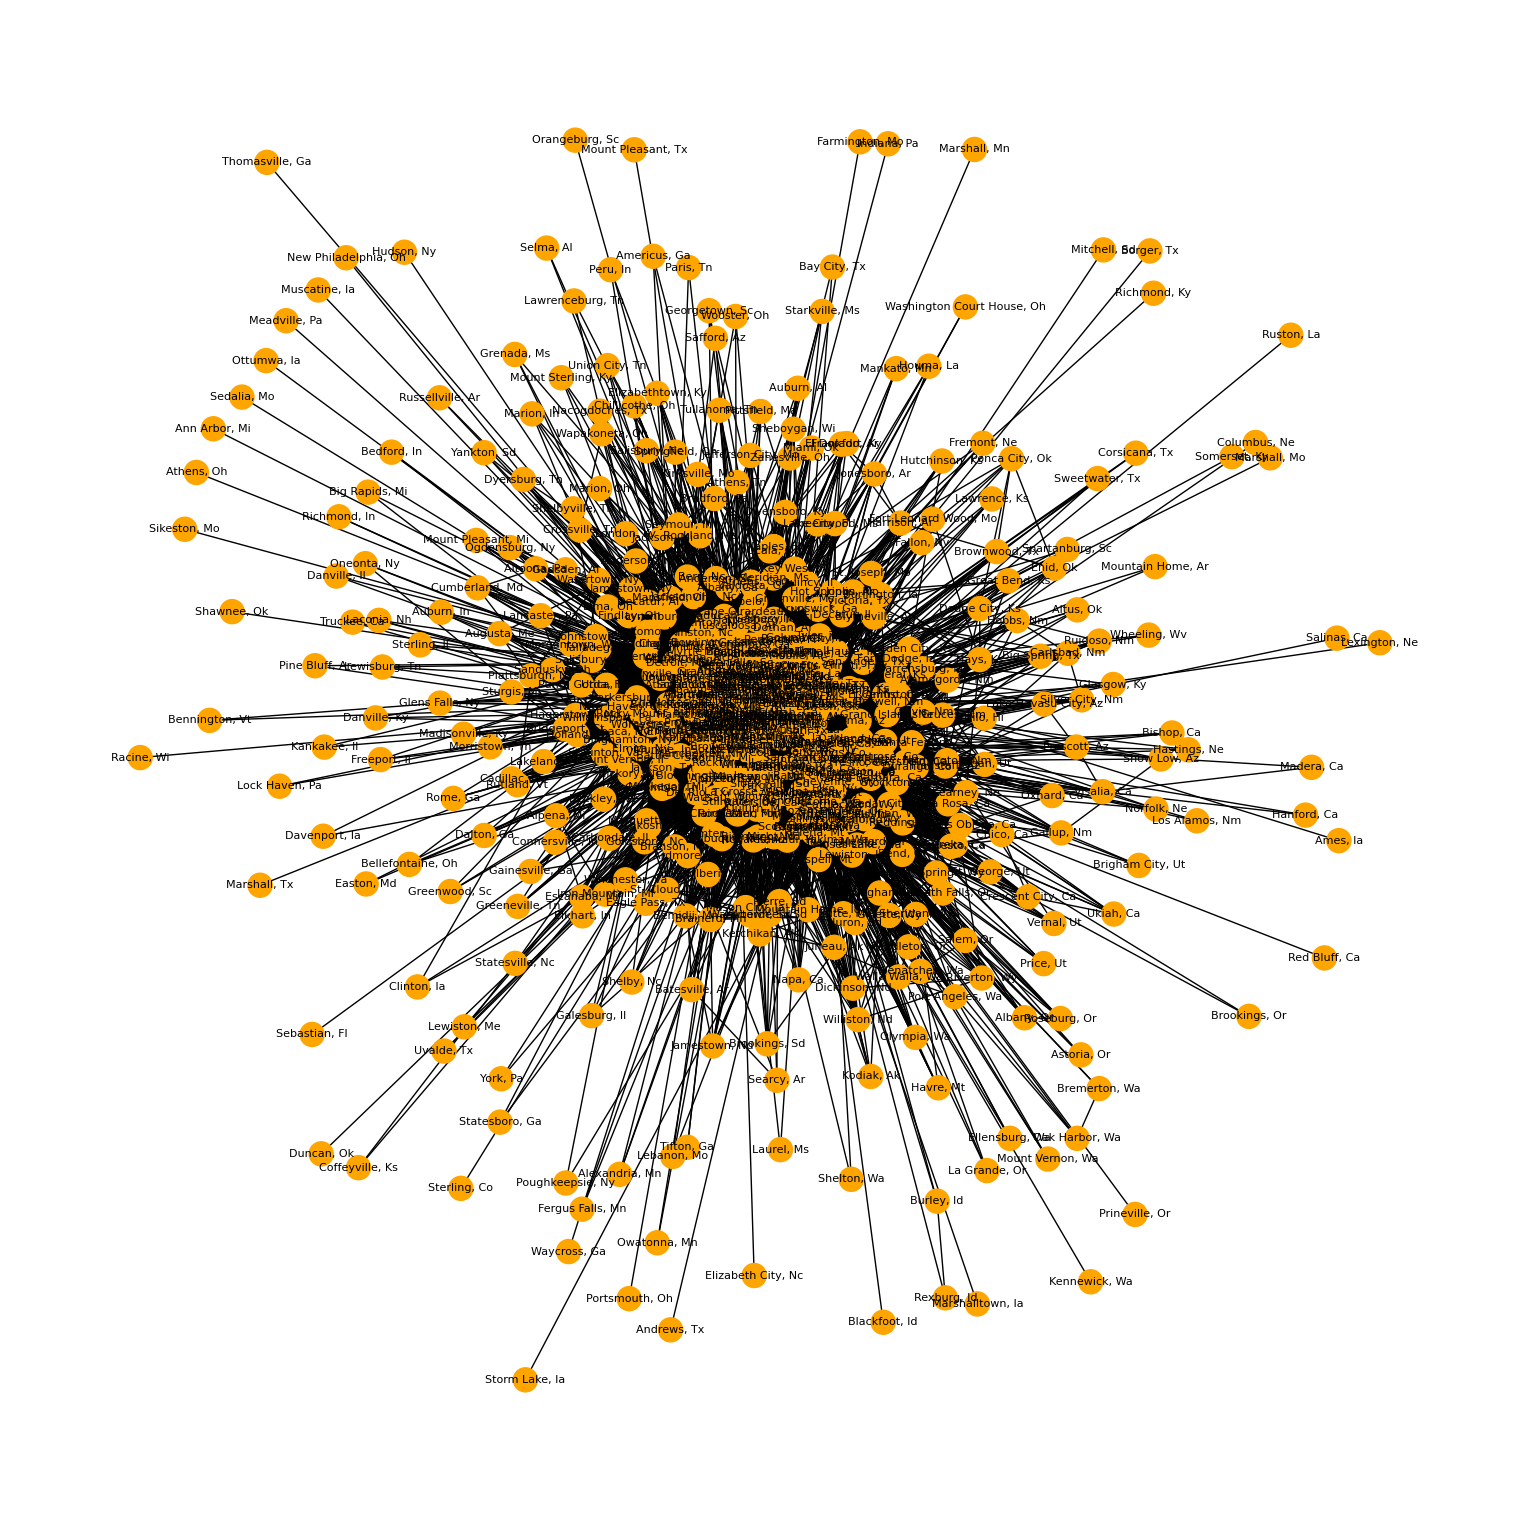

In [15]:
# Crea un sotto-grafo con la prima componente
subgraph = G.subgraph(communities[0])

# Imposta il colore dei nodi
color_map = ['orange' for _ in subgraph.nodes()]

#pos = nx.spring_layout(subgraph, k=0.1)  # k controlla la distanza tra i nodi


# Disegna il sotto-grafo
plt.figure(figsize=(15, 15))  # Imposta una dimensione adeguata per la figura
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()


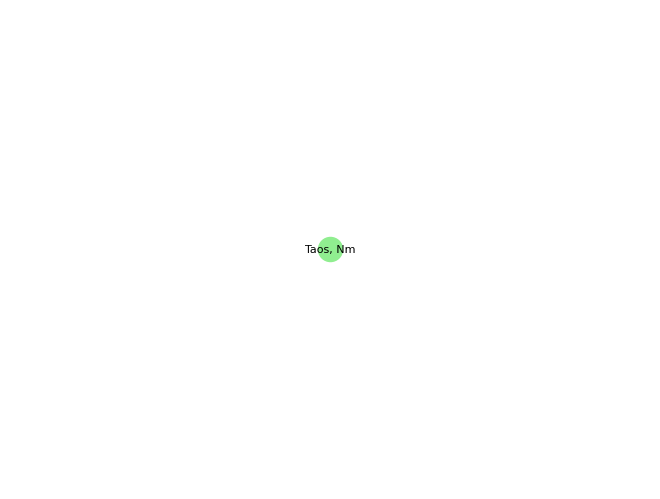

In [16]:
# Crea un sotto-grafo con la seconda componente
subgraph = G.subgraph(communities[1])

# Imposta il colore dei nodi
color_map = ['lightgreen' for _ in subgraph.nodes()]

# Disegna il sotto-grafo
#plt.figure(figsize=(15, 15))
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()


In [17]:
# Crea un sotto-grafo con la seconda componente
subgraph = G.subgraph(communities[2])

# Imposta il colore dei nodi
color_map = ['skyblue' for _ in subgraph.nodes()]

# Disegna il sotto-grafo
#plt.figure(figsize=(15, 15))
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

IndexError: list index out of range

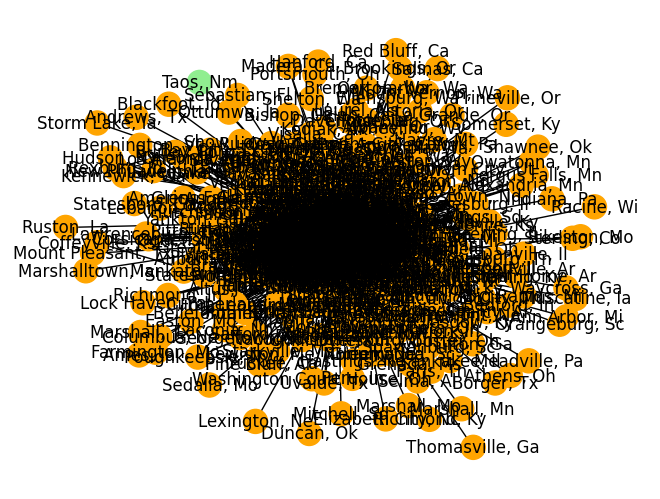

In [18]:
# plot the first community

color_map = []

for node in G:
    if node in communities[0]:
        color_map.append('orange')
    elif node in communities[1]:
        color_map.append('lightgreen')
    else:
        color_map.append('skyblue')

nx.draw(G, node_color=color_map, with_labels=True)

plt.show()